In [105]:
import random
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [106]:
import os
if os.name == 'nt' :
    font_family = "Malgun Gothic"
else :
    font_family = "AppleGothic"

In [107]:
sns.set(font=font_family, rc = {"axes.unicode_minus" : False})

In [108]:
np_data = np.random.randint(1, 100, size = 3000)
data = list(np_data)
data[0:2]

[15, 16]

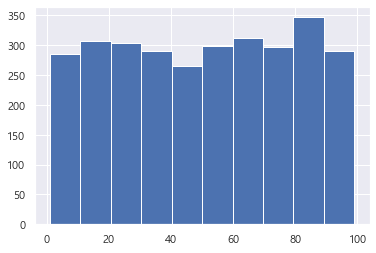

In [109]:
plt.hist(data)
plt.show()

In [110]:
data_mean = np.mean(data)
data_std = np.std(data)

print(data_mean)
print(data_std)

50.625
28.589899877404257


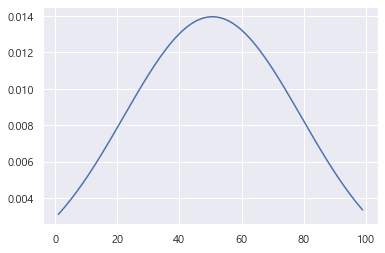

In [111]:
pdf = stats.norm.pdf(np.sort(data), data_mean, data_std)

plt.figure()
plt.plot(np.sort(data), pdf)

2.3684757858670005e-18
1.0


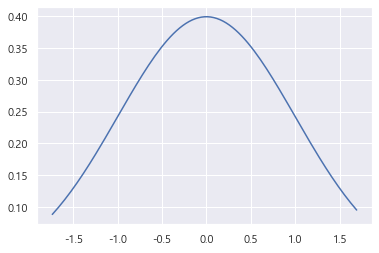

In [112]:
std_list = []

for i in data :
    z = (i - data_mean) / data_std
    std_list.append(z)

ol_data_mean = np.mean(std_list)
ol_data_std = np.std(std_list)

print(ol_data_mean)
print(ol_data_std)

ol_pdf = stats.norm.pdf(np.sort(std_list), ol_data_mean, ol_data_std)

plt.figure()
plt.plot(np.sort(std_list), ol_pdf)

In [113]:
ol_data = data.copy()
ol_no = 10

for i in range (ol_no) :
    rand_no = random.randint(0, len(data))
    ol_data.insert(rand_no, ol_data[rand_no]*2)

50.856146179401996
28.95176829614468


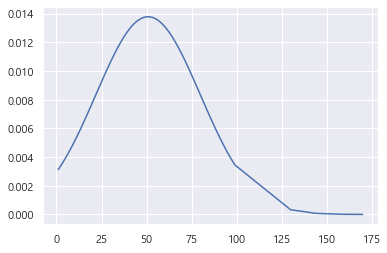

In [114]:
ol_data_mean = np.mean(ol_data)
ol_data_std = np.std(ol_data)

print(ol_data_mean)
print(ol_data_std)

ol_pdf = stats.norm.pdf(np.sort(ol_data), ol_data_mean, ol_data_std)

plt.figure()
plt.plot(np.sort(ol_data), ol_pdf)

-1.12128837038554e-16
0.9999999999999999


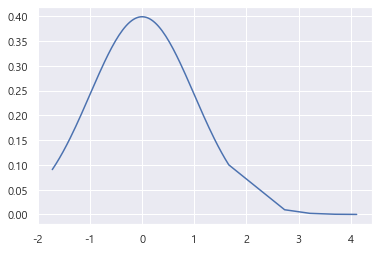

In [115]:
ol_std_list = []

for i in ol_data :
    z = (i - ol_data_mean) / ol_data_std
    ol_std_list.append(z)
    
ol_st_data_mean = np.mean(ol_std_list)
ol_st_data_std = np.std(ol_std_list)

print(ol_st_data_mean)
print(ol_st_data_std)

ol_std_pdf = stats.norm.pdf(np.sort(ol_std_list), ol_st_data_mean, ol_st_data_std)

plt.figure()
plt.plot(np.sort(ol_std_list), ol_std_pdf)

In [116]:
len(ol_std_list)

3010

In [117]:
for i in ol_std_list :
    z = i
    if z > 2 :
        ol_std_list.remove(z)
    if z < -2 :
        ol_std_list.remove(z)

In [118]:
len(ol_std_list)

3004

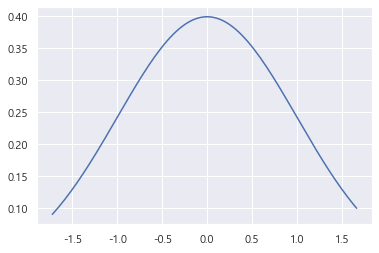

In [119]:
ol_std_pdf = stats.norm.pdf(np.sort(ol_std_list), ol_st_data_mean, ol_st_data_std)

plt.figure()
plt.plot(np.sort(ol_std_list), ol_std_pdf)

In [120]:
boxdata = pd.DataFrame(np.random.randn(100,3), columns = ["A열", "B열", "C열"])
boxdata.head()

,A열,B열,C열
0,0.767392,1.241088,0.294261
1,1.326093,0.870357,-1.114114
2,-0.775888,0.363276,-1.755710
3,1.131120,-0.678359,1.615854
4,0.596512,-0.524710,-1.580569


In [121]:
boxdata.describe()

,A열,B열,C열
count,100.000000,100.000000,100.000000
mean,-0.007697,0.047562,0.062508
std,1.073454,0.986222,1.150787
min,-2.859260,-1.747972,-2.848832
25%,-0.613484,-0.613600,-0.651547
50%,0.134141,0.077059,0.095863
75%,0.689224,0.708871,0.698964
max,2.302693,2.335263,3.067179


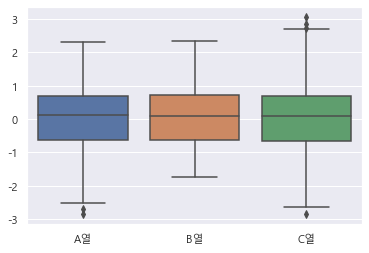

In [122]:
sns.boxplot(data = boxdata)
plt.show()

In [130]:
def get_outlier(df=None, column=None, weight=1.5) :
    quantile_25 = np.percentile(df[column].values, 25)
    quantile_75 = np.percentile(df[column].values, 75)
    
    IQR = quantile_75 - quantile_25
    IQR_weight = IQR*weight
    
    lowest = quantile_25 - IQR_weight
    highest = quantile_75 + IQR_weight
    
    outlier_idx = df[column][(df[column]<lowest) | (df[column] > highest)].index
    return outlier_idx

outlier_idx = get_outlier(df=boxdata, column='A열', weight=1.5)
outlier_idx

Int64Index([], dtype='int64')

In [131]:
boxdata.drop(outlier_idx, axis=0, inplace=True)
boxdata.shape

(94, 3)

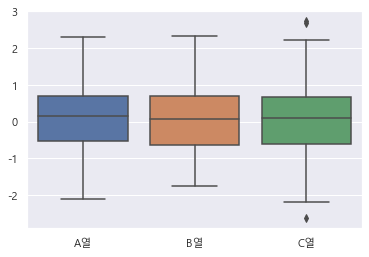

In [132]:
sns.boxplot(data = boxdata)
plt.show()

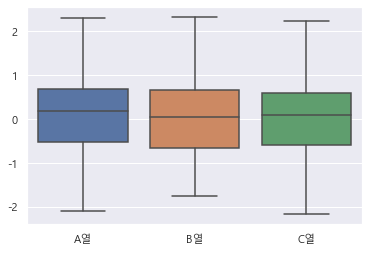

In [133]:
outlier_idx = get_outlier(df=boxdata, column='C열', weight=1.5)
outlier_idx

boxdata.drop(outlier_idx, axis=0, inplace=True)

boxdata.shape

sns.boxplot(data = boxdata)
plt.show()

In [127]:
boxdata.shape

(98, 3)